In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

1. Perform data preparations to clean data
2. Exploratory Data Analysis (explore the distributions and characteristics of the columns and compare variables to view their behavior and relationships)
3. Cluster the data using K-Means, Hierarchical Clustering
4. Create a prediction model using any classification algorithm and compare the results
5. Submit your result through Github with the code run and showing results

In [87]:
import pandas as pd
data = pd.read_csv(r"C:\Users\ACER\Downloads\alp DATA\data.csv", sep=';')
data.head(20)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
5,2,39,1,9991,0,19,133.1,1,37,37,...,0,5,17,5,11.500000,5,16.2,0.3,-0.92,Graduate
6,1,1,1,9500,1,1,142.0,1,19,38,...,0,8,8,8,14.345000,0,15.5,2.8,-4.06,Graduate
7,1,18,4,9254,1,1,119.0,1,37,37,...,0,5,5,0,0.000000,0,15.5,2.8,-4.06,Dropout
8,1,1,3,9238,1,1,137.0,62,1,1,...,0,6,7,6,14.142857,0,16.2,0.3,-0.92,Graduate
9,1,1,1,9238,1,1,138.0,1,1,19,...,0,6,14,2,13.500000,0,8.9,1.4,3.51,Dropout


DATA CLEANING & PREPARATION
1. cek apakah masih ada missing value pada data
2. lakukan label encoder
3. lakukan feature scaling pada data
4. visualisasi

In [88]:
#Missing values
data.isnull().any()

Marital status                                    False
Application mode                                  False
Application order                                 False
Course                                            False
Daytime/evening attendance\t                      False
Previous qualification                            False
Previous qualification (grade)                    False
Nacionality                                       False
Mother's qualification                            False
Father's qualification                            False
Mother's occupation                               False
Father's occupation                               False
Admission grade                                   False
Displaced                                         False
Educational special needs                         False
Debtor                                            False
Tuition fees up to date                           False
Gender                                          

In [89]:
#Cek tipe data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [90]:
# Drop kolom yang tidak diperlukan
list_kolom = ["Mother's qualification", "Father's qualification", "Educational special needs",  ]
df = data.drop(columns=list_kolom, axis=1)
display(df)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's occupation,Father's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,5,9,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,3,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,9,9,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,5,3,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,9,9,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,5,4,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,9,9,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,9,9,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,7,4,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [91]:
# menghitung jumlah data redundan
jumlah_duplikat = data.duplicated().sum()

# Menampilkan jumlah data yang duplikat
print("Jumlah data yang duplikat:", jumlah_duplikat)

Jumlah data yang duplikat: 0


In [92]:
#label encoder
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
data['Target'] = labelencoder.fit_transform(data['Target'])
data.head()


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2


C:\Users\ACER\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


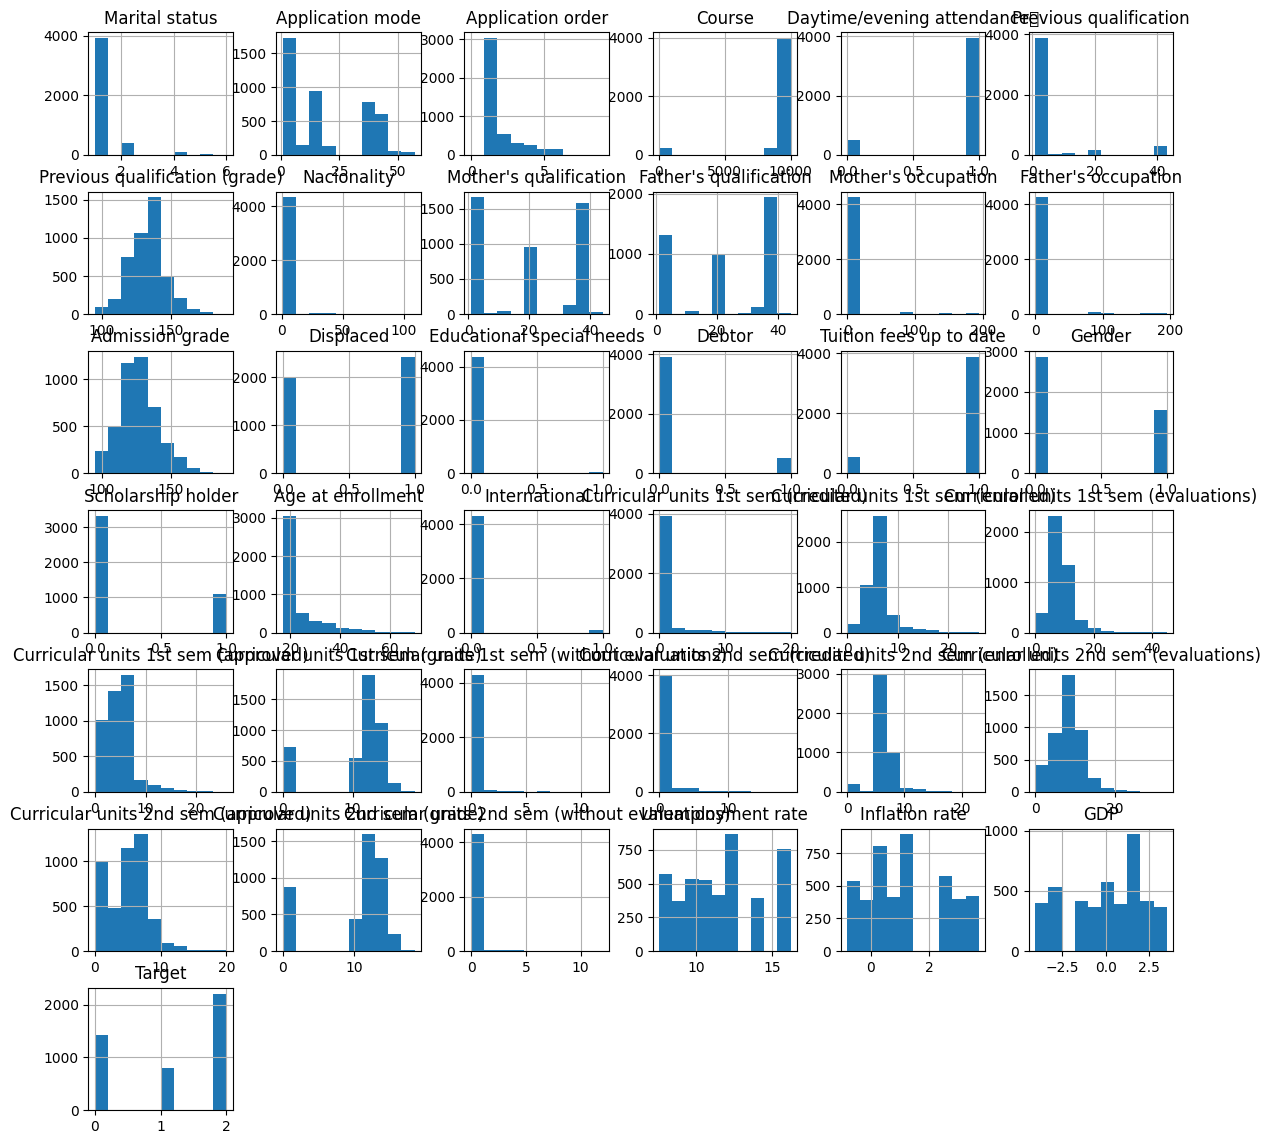

In [93]:
import matplotlib.pyplot as plt

# menampilkan distribusi data di dalam bentuk grafik
data.hist(figsize=(14, 14))
plt.show()

In [94]:
#Feature Scaling
X_data = data[['Curricular units 2nd sem (grade)', 'Course']]
X_data.head(5)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scale_data = scaler.fit_transform(X_data)
scale_df = pd.DataFrame(scale_data, columns = ['Curricular units 2nd sem (grade)', 'Course'])
scale_df.head(5)

,Curricular units 2nd sem (grade),Course
0,-1.963489,-4.209520
1,0.659562,0.192580
2,-1.963489,0.103404
3,0.416450,0.444115
4,0.531608,-0.408389


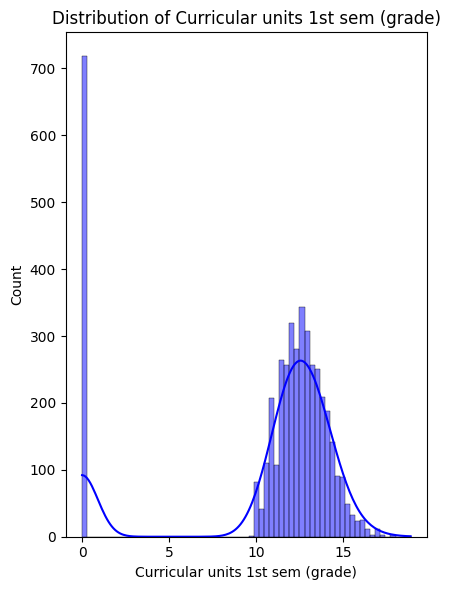

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.histplot(data['Curricular units 1st sem (grade)'], kde=True, color='blue')
plt.title('Distribution of Curricular units 1st sem (grade)')

plt.tight_layout()
plt.show()

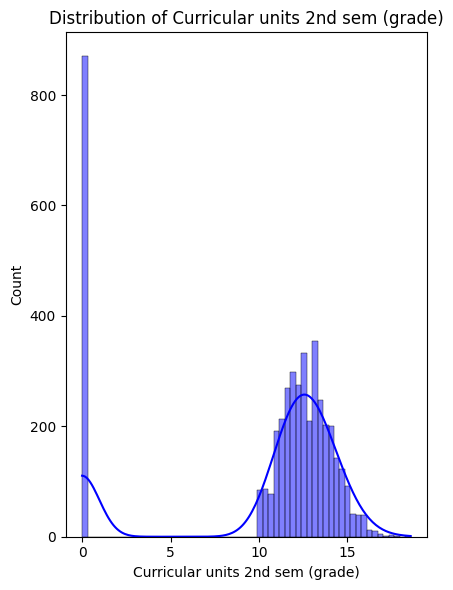

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.histplot(data['Curricular units 2nd sem (grade)'], kde=True, color='blue')
plt.title('Distribution of Curricular units 2nd sem (grade)')

plt.tight_layout()
plt.show()

EDA

c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\utils.py:84: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
C:\Users\ACER\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


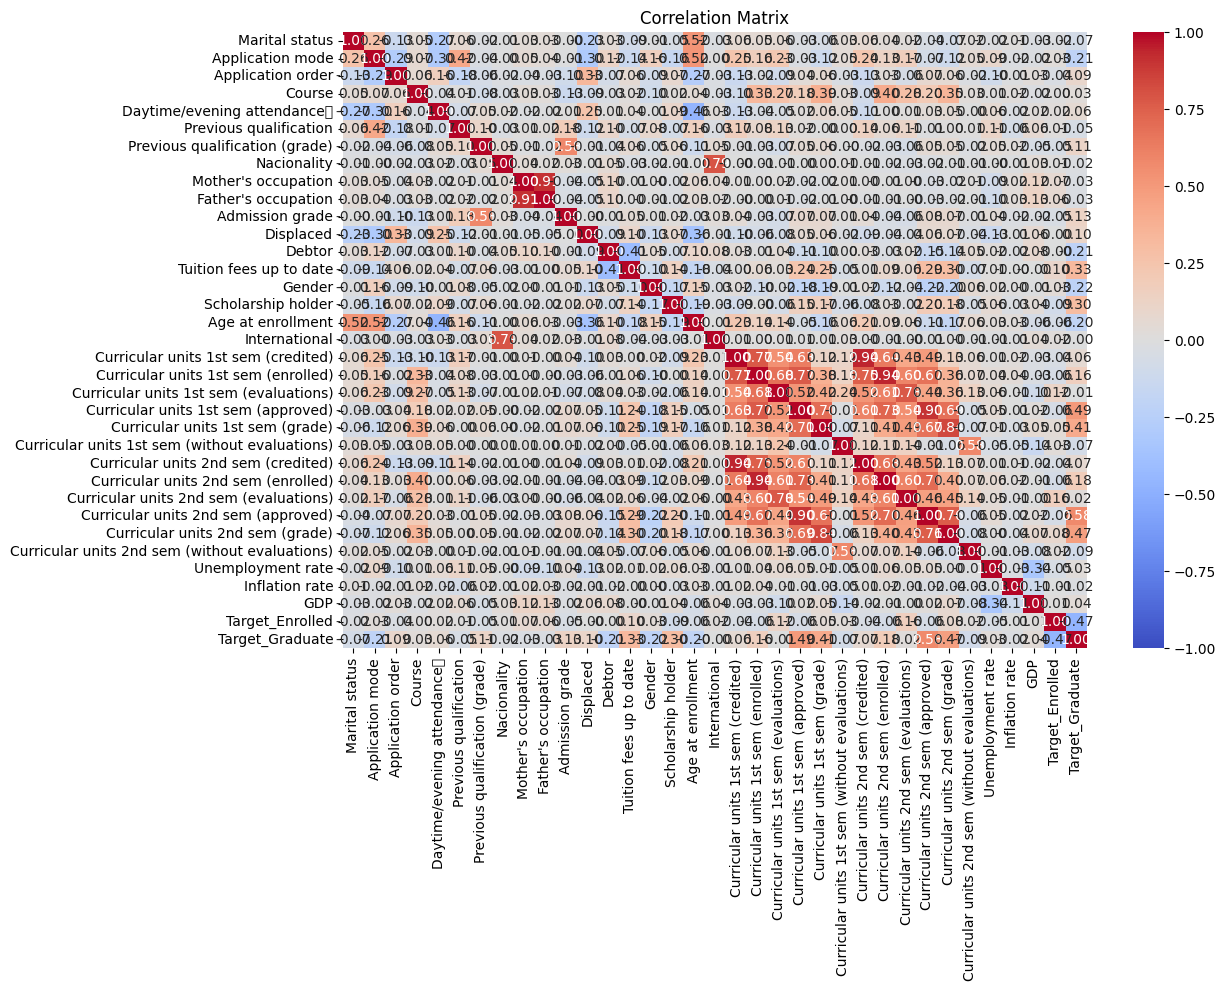

In [104]:

df_data = pd.get_dummies(df, columns=['Target'], drop_first=True)

correlation_matrix = df_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


In [106]:
import pandas as pd
import numpy as np
corr_matrix = data.corr()

# Compute the correlation matrix
corr_matrix = np.corrcoef(data.select_dtypes(include=['float64', 'int64']).values.T)

print(corr_matrix)

[[ 1.          0.26400582 -0.12585445 ... -0.02033757  0.00876135
  -0.02700341]
 [ 0.26400582  1.         -0.28635726 ...  0.08908008 -0.01637463
  -0.02274272]
 [-0.12585445 -0.28635726  1.         ... -0.09841917 -0.01113321
   0.03020082]
 ...
 [-0.02033757  0.08908008 -0.09841917 ...  1.         -0.02888466
  -0.33517812]
 [ 0.00876135 -0.01637463 -0.01113321 ... -0.02888466  1.
  -0.11229464]
 [-0.02700341 -0.02274272  0.03020082 ... -0.33517812 -0.11229464
   1.        ]]


C:\Users\ACER\AppData\Local\Temp\ipykernel_18988\3741483394.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Target', data=df, palette='pastel', edgecolor=".6")


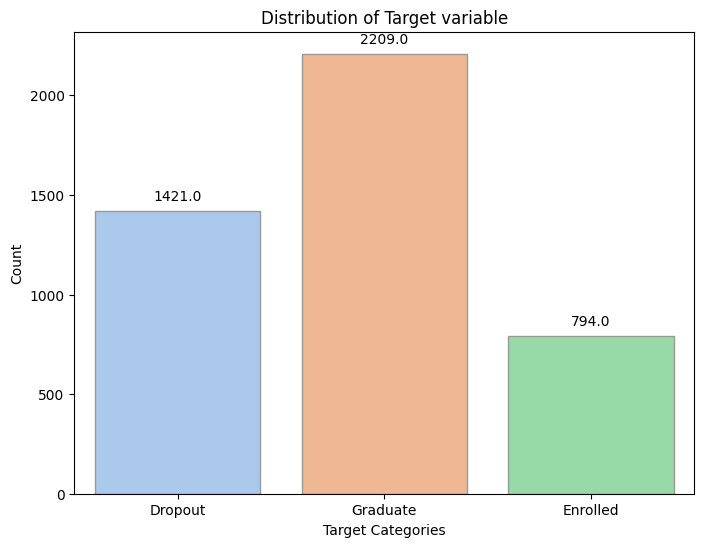

In [107]:
# Target Analysis - Count plot for Target variable 
plt.figure(figsize=(8, 6))
sns.countplot(x='Target', data=df, palette='pastel', edgecolor=".6")
plt.title('Distribution of Target variable')
plt.xlabel('Target Categories')
plt.ylabel('Count')


for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

plt.show()


CLUSTERING (K-MEANS & Hierarchical Clustering)

c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kme

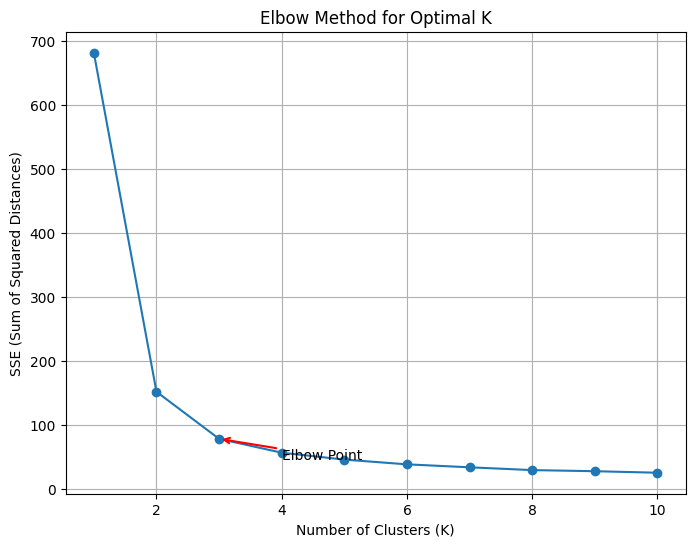

In [108]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Load the Iris dataset
iris_data = load_iris()
X_data = iris_data.data

inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_data)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('SSE (Sum of Squared Distances)')
plt.title('Elbow Method for Optimal K')
plt.annotate('Elbow Point', xy=(3, inertia[2]), xytext=(4, inertia[4]), 
             arrowprops=dict(arrowstyle='->', lw=1.5, color='red'))
plt.grid(True)
plt.show()


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


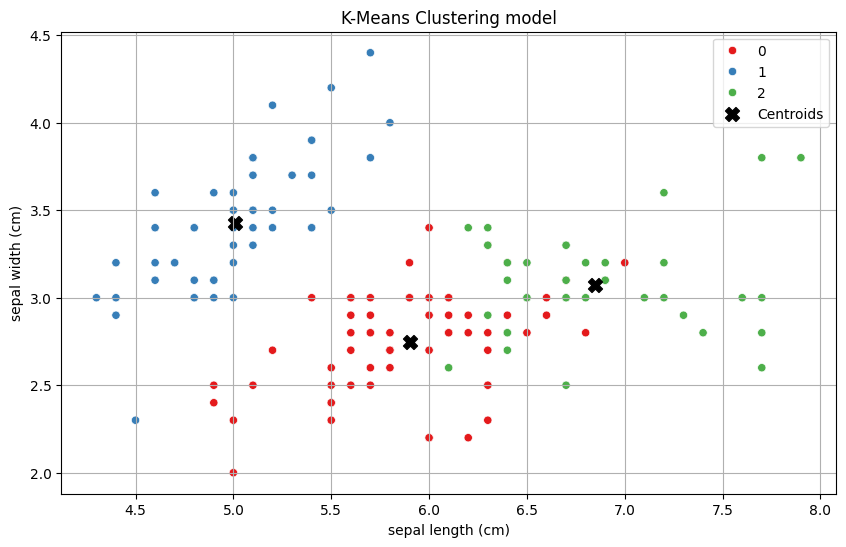

In [43]:
from sklearn import datasets
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

data = datasets.load_iris()
X_data = pd.DataFrame(data.data, columns=data.feature_names)

kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X_data)

cluster_labels = kmeans.labels_
X_data['Cluster'] = cluster_labels

centroids = kmeans.cluster_centers_

# Plotting the scatter chart
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', data=X_data, hue='Cluster', palette='Set1', legend='full')
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='X', s=100, label='Centroids')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title('K-Means Clustering model')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [109]:
# assign cluster with K-Means algorithm
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, init='random', max_iter=300, random_state=42)
cluster = kmeans.fit_predict(X_data)
print(cluster)

[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 0 0 0 3 0 3 0 3 0 3 3 3 3 0 3 0 3 3 0 3 0 3 0 0
 0 0 0 0 0 3 3 3 3 0 3 0 0 0 3 3 3 0 3 3 3 3 3 0 3 3 1 0 2 1 1 2 3 2 1 2 1
 1 1 0 1 1 1 2 2 0 1 0 2 0 1 2 0 0 1 2 2 2 1 0 0 2 1 1 0 1 1 1 0 1 1 1 0 1
 1 0]


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


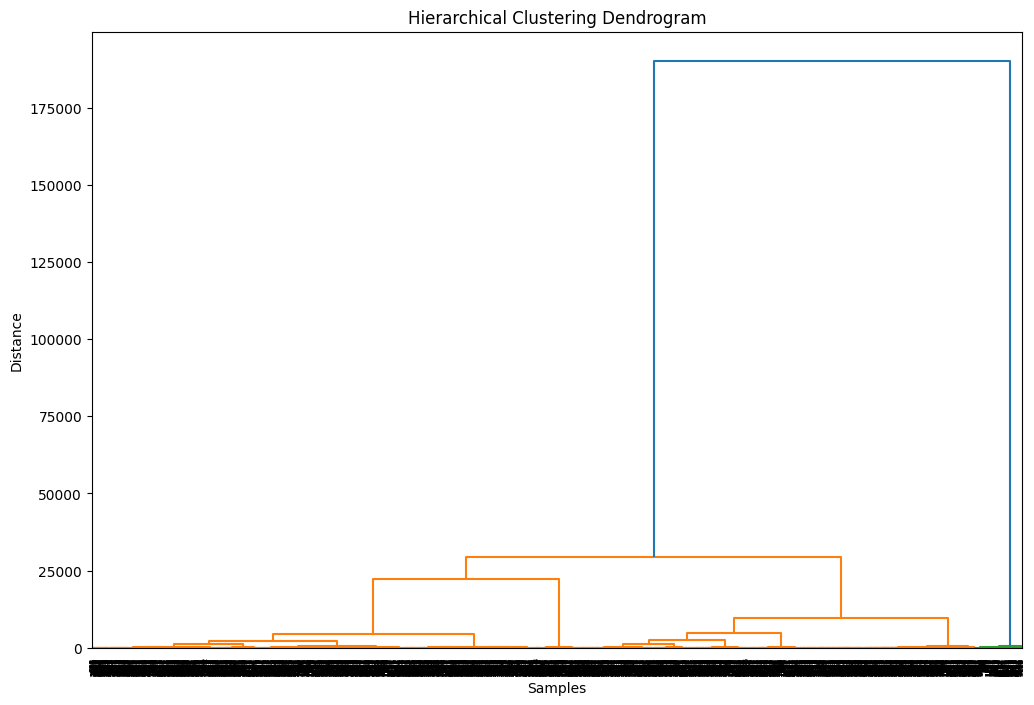

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram
import pandas as pd

# Assuming 'data' is your DataFrame
X_data = data

# Select specific columns for hierarchical clustering
selected_columns = ['Curricular units 2nd sem (grade)', 'Course']
X_data_selected = X_data[selected_columns]

# Perform hierarchical clustering using linkage
linkage_matrix = linkage(X_data_selected, method='ward', metric='euclidean')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, orientation='top', labels=X_data.index, distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()


Random Forest:
  Testing Accuracy: 0.7604519774011299
              precision    recall  f1-score   support

           0       0.85      0.77      0.81       316
           1       0.49      0.30      0.37       151
           2       0.76      0.92      0.83       418

    accuracy                           0.76       885
   macro avg       0.70      0.66      0.67       885
weighted avg       0.75      0.76      0.74       885



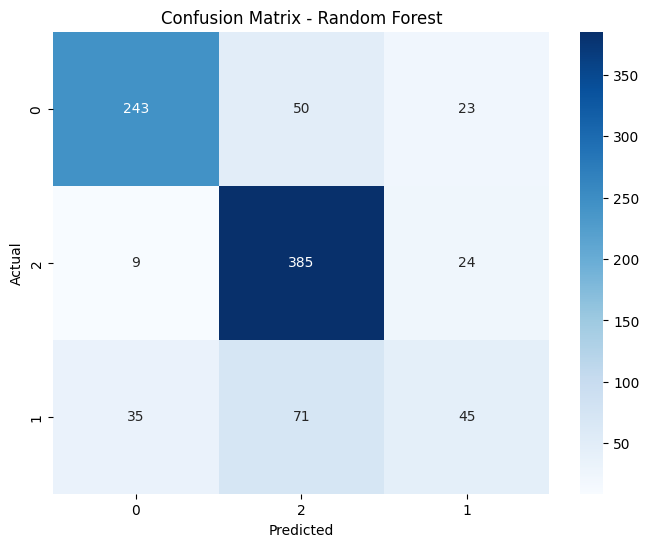


--------------------------------------------------

K-Nearest Neighbors:
  Testing Accuracy: 0.6090395480225989
              precision    recall  f1-score   support

           0       0.66      0.56      0.60       316
           1       0.36      0.26      0.31       151
           2       0.64      0.77      0.70       418

    accuracy                           0.61       885
   macro avg       0.55      0.53      0.54       885
weighted avg       0.60      0.61      0.60       885



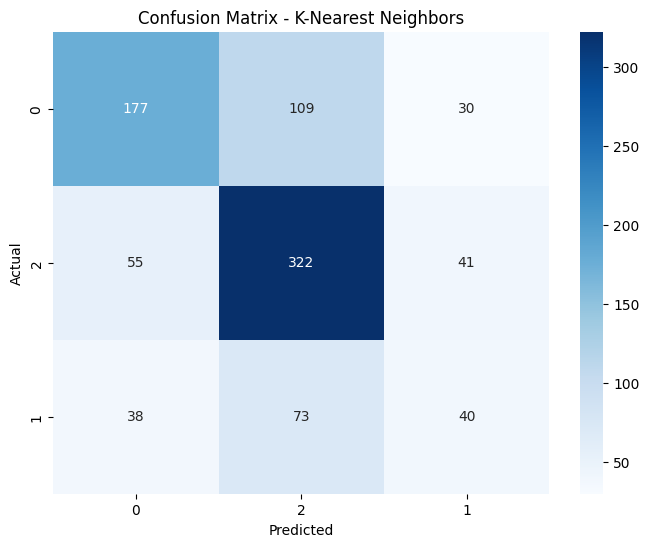


--------------------------------------------------



c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression:
  Testing Accuracy: 0.6587570621468927
              precision    recall  f1-score   support

           0       0.75      0.59      0.66       316
           1       0.29      0.03      0.06       151
           2       0.63      0.94      0.75       418

    accuracy                           0.66       885
   macro avg       0.56      0.52      0.49       885
weighted avg       0.62      0.66      0.60       885



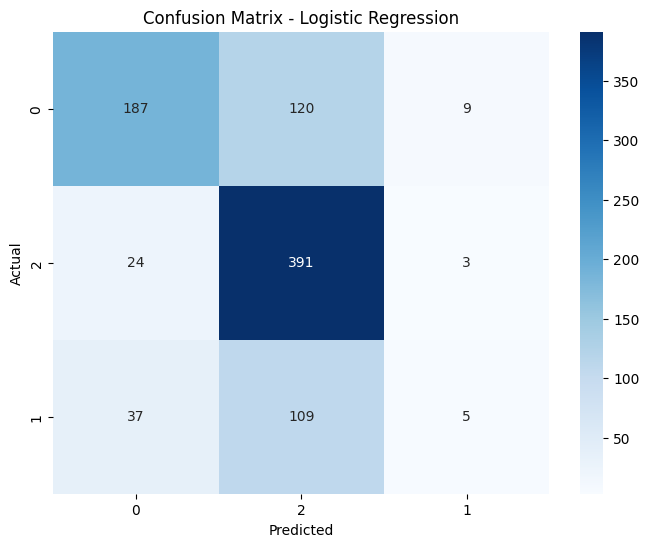


--------------------------------------------------

XGBoost:
  Testing Accuracy: 0.7694915254237288
              precision    recall  f1-score   support

           0       0.84      0.75      0.79       316
           1       0.52      0.43      0.47       151
           2       0.79      0.91      0.85       418

    accuracy                           0.77       885
   macro avg       0.72      0.70      0.70       885
weighted avg       0.76      0.77      0.76       885



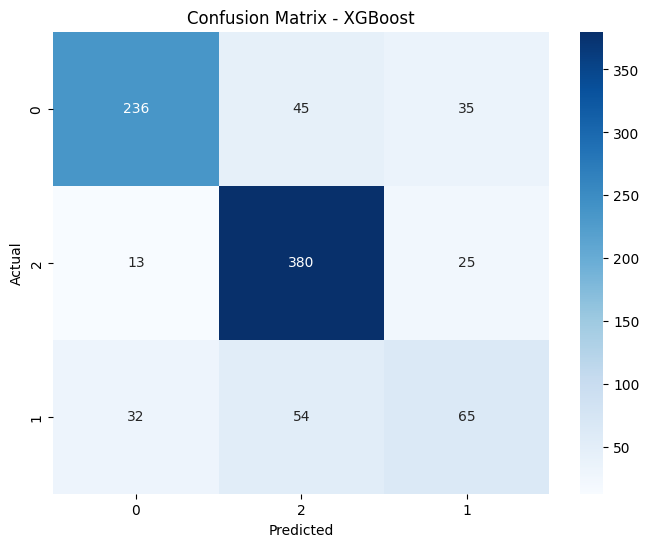


--------------------------------------------------



In [117]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

X = data.drop('Target', axis=1)
y = data['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifiers = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(random_state=42),
    'XGBoost': XGBClassifier(),
}

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name}:')
    print(f'  Testing Accuracy: {accuracy}')
    print(classification_report(y_test, y_pred))

    # Plotting confusion matrix using seaborn
    cm = confusion_matrix(y_test, y_pred, labels=data['Target'].unique())
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=data['Target'].unique(), yticklabels=data['Target'].unique())
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    print('\n' + '-'*50 + '\n')


KESIMPIULAN

- XGBoost memiliki akurasi tertinggi di antara empat model, dengan nilai 0.7694915254237288
- Random Forest juga memberikan hasil yang baik, dengan akurasi 0.7604519774011299

Logistic Regression dan K-Nearest Neighbors memiliki akurasi lebih rendah, tetapi Logistic Regression masih lebih baik dari K-Nearest Neighbors.
Oleh karena itu, jika ingin memilih model berdasarkan akurasi, XGBoost dan Random Forest bisa menjadi pilihan yang baik.